In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
ads_df = pd.read_csv('ads_data.csv')

In [4]:
ads_clients_df = pd.read_csv('ads_clients_data.csv')

In [5]:
ads_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [6]:
ads_clients_df.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


**Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 
Тонкий момент: помните, что некоторые показываемые объявления не кликались, 
и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. 
Округлите ответы до целых чисел.**

In [213]:
ads_df\
    .groupby(['ad_id', 'event'], as_index=False)\
    .agg({'time': 'count'})\
    .rename(columns={'time': 'count'})\
    .pivot(index='ad_id', columns='event', values='count')\
    .fillna(0)\
    .mean() # среднее количество кликов и показов на объявление

event
click    113.137824
view     923.131606
dtype: float64

**Давайте посмотрим на распределение показов объявлений!**
- По оси x – число показов
- По оси y – доля объявлений с такими показами

**Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.**

In [215]:
views = ads_df\
    .query('event == "view"')\
    .groupby(['ad_id', 'event'], as_index=False)\
    .agg({'time': 'count'})\
    .rename(columns={'time': 'count'})\
    .pivot(index='ad_id', columns='event', values='count')\
    .fillna(0)

In [216]:
views_log = np.log(views.view)

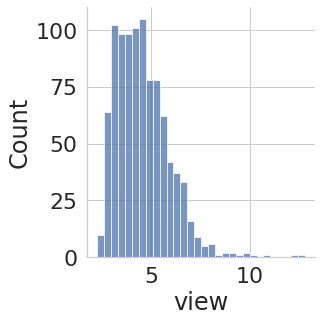

In [217]:
sns.displot(views_log)

**Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, 
у которых не было показов (обычное среднее). 
После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.**

**Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.**

In [219]:
ads_by_day_mean = ads_df\
    .query('event == "view"')\
    .groupby(['ad_id', 'date'])\
    .agg(day_count=('event', 'count'))\
    .groupby('date')\
    .agg({'day_count': 'mean'})

In [220]:
ads_by_day_mean_ma = ads_df\
    .query('event == "view"')\
    .groupby(['ad_id', 'date'])\
    .agg(day_count=('event', 'count'))\
    .groupby('date')\
    .agg({'day_count': 'mean'})\
    .rolling(2).mean() # убрал as_index, дата появилась

In [221]:
ads_by_day_mean_ma.round()

,day_count
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


**Скользящее среднее часто используется для поиска аномалий в данных. 
Давайте попробуем нанести на один график значения просто среднего количества показов по дням 
и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).**

**Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd**

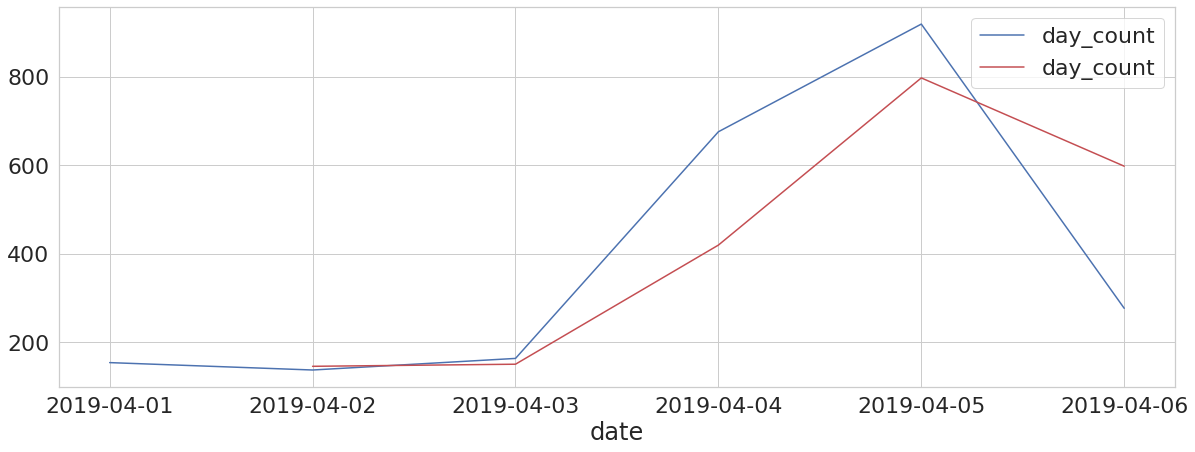

In [223]:
sns.lineplot(data = ads_by_day_mean)
sns.lineplot(data = ads_by_day_mean_ma, palette=['r']) # palette = color

In [224]:
abs(ads_by_day_mean_ma.day_count - ads_by_day_mean.day_count).idxmax()

'2019-04-06'

In [225]:
ads_full = ads_df.merge(ads_clients_df, how='left', on='client_union_id')

In [226]:
ads_full.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22


In [244]:
ads_full.dtypes

date_x                    datetime64[ns]
time                              object
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
date_y                    datetime64[ns]
community_id                       int64
create_date               datetime64[ns]
date_range               timedelta64[ns]
dtype: object

In [245]:
ads_full[['date_x', 'date_y', 'create_date']] = ads_full[['date_x', 'date_y', 'create_date']]\
    .apply(pd.to_datetime, format='%Y-%m-%d')

In [246]:
ads_full.dtypes

date_x                    datetime64[ns]
time                              object
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
date_y                    datetime64[ns]
community_id                       int64
create_date               datetime64[ns]
date_range               timedelta64[ns]
dtype: object

In [274]:
ads_full['date_range'] = ads_full.date_x - ads_full.create_date

In [275]:
ads_date_range = ads_full\
    .groupby(['client_union_id'], as_index=False)\
    .agg({'date_range': 'min'})

In [276]:
ads_date_range.date_range.mean()

Timedelta('124 days 09:04:43.532219570')

**Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. 
Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна
50 / 1000 ∗100=5%**

In [278]:
clients_365 = ads_date_range

In [279]:
clients_365\
    .query('date_range < "365 days"')

,client_union_id,date_range
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [280]:
round(clients_365.client_union_id.nunique() / ads_clients_df.client_union_id.nunique() * 100, 2)

0.69

**Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
Определите, сколько уникальных клиентов запустили свое первое объявление 
в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].**

In [282]:
cuts = pd.to_timedelta(['0 days', '30 days', '90 days', '180 days', '365 days'])

In [283]:
labels = ['30', '90', '180', '365']

In [284]:
clients_365 = pd.cut(clients_365['date_range'], bins=cuts, labels=labels)

In [285]:
clients_365.value_counts()

180    396
90     263
365    168
30      11
Name: date_range, dtype: int64

**И последнее задание: постройте интерактивный барплот, 
на котором будут показаны категории с количеством уникальных клиентов в них**

In [293]:
px.bar(clients_365, text='value')